# Analyzing Star Wars Survey

In this project, we will be focusing mainly on cleaning the data obtained from Star Wars Survey conducted by [FiveThirtyEight](https://fivethirtyeight.com/). The team's hypothesis was that "Empire Strikes Back" was the best of the Star Wars Trilogy and wanted to find out if Star Wars fans shared the same sentiments. Using the online tool SurveyMonkey, they received 835 total responses, which can be downloaded from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In [1]:
# read in data set
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
# Explore Data Set
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [3]:
# Review Column Names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

We can see that there are a few unnamed columns which are likely due to inputs for the preceding question.

## Cleaning and Mapping Yes/No Columns

There are two Columns which contain Yes/No questions.
- Have you seen any of the 6 films in the Star Wars franchise
- Do you consider yourself to be a fan of the Star Wars film franchise

The inputs would include either Yes, No or null values when the respondent chooses not to provide an answer. We will convert these values to Boolean values to make the data easier to analyze later,

In [4]:
# Create map
yes_no = {
    'Yes' : True,
    'No' : False
}

# Map to dataframe to replace values with booleans
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

# inspect
star_wars[['Have you seen any of the 6 films in the Star Wars franchise?',
           'Do you consider yourself to be a fan of the Star Wars film franchise?']].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
0,True,True
1,False,NaN
2,True,False
3,True,True
4,True,True


# Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

Which of the following Star Wars films have you seen? Please select all that apply. — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- `Unnamed: 4` — whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
- `Unnamed: 5` — whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
- `Unnamed: 6` — whether or not the respondent saw `Star Wars: Episode IV A New Hope`.
- `Unnamed: 7` — whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
- `Unnamed: 8` — whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We will convert each of these columns to a Boolean and then rename the columns into something more intuitive.

In [5]:
# import numpy
import numpy as np
# Create Maps
map1 = {
    'Star Wars: Episode I  The Phantom Menace' : True,
    np.NaN: False
}

map2 = {
    'Star Wars: Episode II Attack of the Clones' : True,
    np.NaN: False
    
}

map3 = {
    'Star Wars: Episode III Revenge of the Sith' : True,
    np.NaN: False
}

map4 = {
    'Star Wars: Episode IV A New Hope':True,
    np.NaN: False 
}

map5 = {
    'Star Wars: Episode V The Empire Strikes Back' : True,
    np.NaN: False
}

map6 = {
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}




In [6]:
# Edit Series to Boolean 
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'] = star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].map(map1)
star_wars['Unnamed: 4'] = star_wars['Unnamed: 4'].map(map2)
star_wars['Unnamed: 5'] = star_wars['Unnamed: 5'].map(map3)
star_wars['Unnamed: 6'] = star_wars['Unnamed: 6'].map(map4)
star_wars['Unnamed: 7'] = star_wars['Unnamed: 7'].map(map5)
star_wars['Unnamed: 8'] = star_wars['Unnamed: 8'].map(map6)

#inspect
star_wars[star_wars.columns[3:9]].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,True,NaN,NaN,NaN,True,True
1,False,False,False,False,False,False
2,True,NaN,NaN,False,False,False
3,True,NaN,NaN,NaN,True,True
4,True,NaN,NaN,NaN,True,True


In [7]:
# Rename Column Head
column_names = star_wars.columns[3:9]
new_names = ['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']
dict = {}
for x,y in zip(column_names,new_names):
    dict[x] = y
star_wars = star_wars.rename(columns = dict)

#inspect
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,NaN,NaN,NaN,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,NaN,NaN,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,NaN,NaN,NaN,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,NaN,NaN,NaN,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
- `Unnamed: 10` — How much the respondent liked `Star Wars: Episode II Attack of the Clones`
- `Unnamed: 11` — How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
- `Unnamed: 12` — How much the respondent liked `Star Wars: Episode IV A New Hope`
- `Unnamed: 13` — How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
- `Unnamed: 14`— How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

We will rename the column headings and change the data type of the input to a numeric type

In [8]:
# Change Data Type to Numeric
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [9]:
# Rename Column Headings
col_names = star_wars.columns[9:15]
new_name = ['ranking_{}'.format(num) for num in range(1,7)]
dict_1 = {}
for x,y in zip(col_names,new_name):
    dict_1[x] = y
star_wars = star_wars.rename(columns = dict_1)

#inspect
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


## Finding the Highest-Ranked Movie

We will find out what the respondents believe the best movie is and visualize the data.

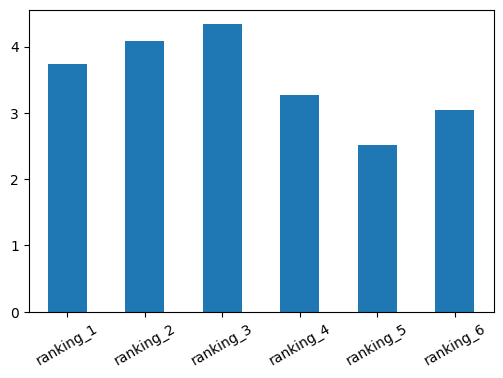

In [12]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate mean ranking
mean_ranking = star_wars[star_wars.columns[9:15]].mean()

# Visualize Data
mean_ranking.plot.bar()
plt.xticks(rotation = 30)
plt.show()

So far, we have cleaned the dataset and made a few columns easier to carry out analysis on. 

From the graph above, `ranking_5` has the lowest average rank. This means that on average, respondents felt that the best movie of the Star Wars Trilogy is Episode 5, The Empire Strikes Back. 

## Finding the Most Viewed Movie

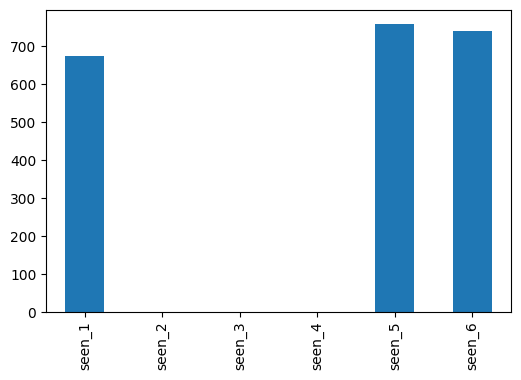

In [13]:
# Calculate total number of movies seen by each respondent 
total_view = star_wars[star_wars.columns[3:9]].sum()
# Visualize Data
total_view.plot.bar()
plt.show()

It seems like none of the respondents seen episode 2,3 and 4.

## Explore the Data by Binary Segments

We shall separate the dataset into 2 groups based on whether they claim to be a fan of the Star Wars Franchise. Afterwards, we will carry out our analysis again to look for any interesting patterns.

In [18]:
#Split Dataset into Binary Segments

fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
non_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

#inspect data
fan.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,NaN,NaN,NaN,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3,3292763116,True,True,True,NaN,NaN,NaN,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,NaN,NaN,NaN,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,True,True,True,NaN,NaN,NaN,True,True,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,True,True,True,NaN,NaN,NaN,True,True,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central


In [19]:
non_fan.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
2,3292765271,True,False,True,NaN,NaN,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
9,3292640424,True,False,False,NaN,False,False,False,False,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific
12,3292609214,True,False,True,NaN,NaN,NaN,True,True,3.0,...,Very favorably,Greedo,No,NaN,No,Male,18-29,"$25,000 - $49,999",Bachelor degree,South Atlantic
21,3292521066,True,False,True,NaN,NaN,NaN,True,False,3.0,...,Neither favorably nor unfavorably (neutral),I don't understand this question,No,NaN,No,Male,18-29,NaN,Bachelor degree,Pacific
30,3292366792,True,False,True,NaN,NaN,NaN,True,True,4.0,...,Somewhat favorably,I don't understand this question,No,NaN,No,Male,30-44,"$0 - $24,999",High school degree,New England


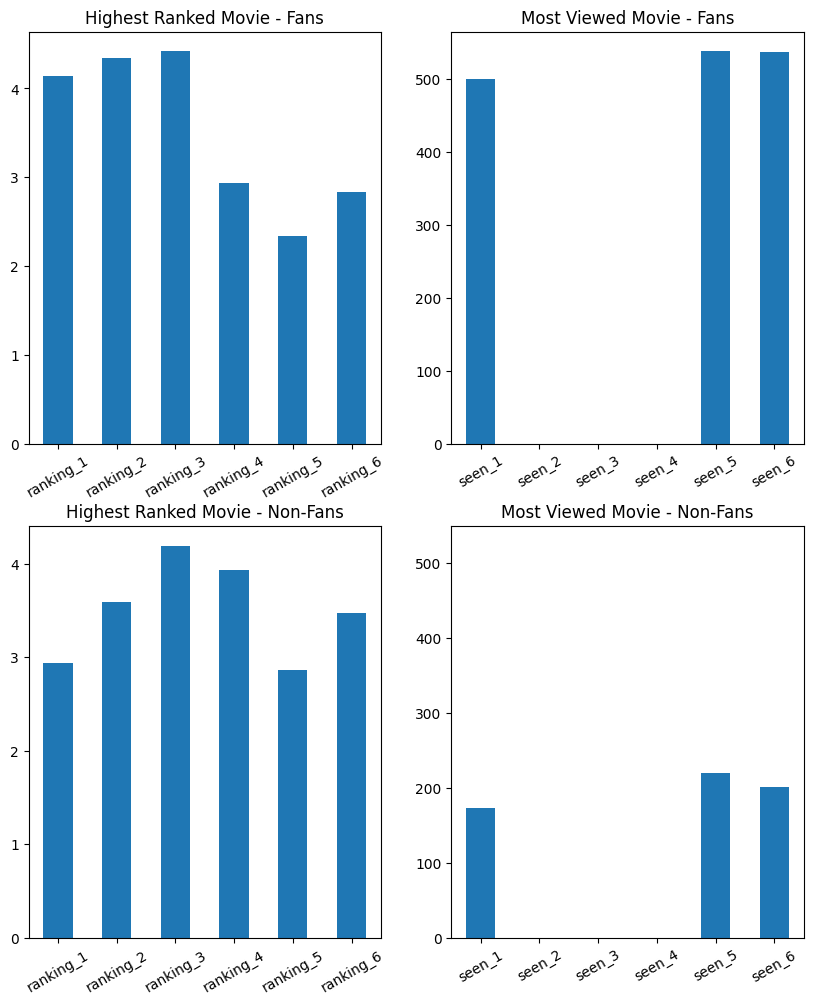

In [38]:
# Acquire Relevant Data
fan_mean = fan[fan.columns[9:15]].mean()
fan_total_viewed = fan[fan.columns[3:9]].sum()
non_fan_mean = non_fan[non_fan.columns[9:15]].mean()
non_fan_total_viewed = non_fan[non_fan.columns[3:9]].sum()
# Plot Graphs for Anaylsis
plt.figure(figsize=(10,12))
plt.subplot(2,2,1)
fan_mean.plot.bar()
plt.xticks(rotation = 30)
plt.title('Highest Ranked Movie - Fans')

plt.subplot(2,2,2)
fan_total_viewed.plot.bar()
plt.xticks(rotation = 30)
plt.title('Most Viewed Movie - Fans')

plt.subplot(2,2,3)
non_fan_mean.plot.bar()
plt.xticks(rotation = 30)
plt.yticks(ticks=[0,1,2,3,4])
plt.title('Highest Ranked Movie - Non-Fans')

plt.subplot(2,2,4)
non_fan_total_viewed.plot.bar()
plt.xticks(rotation = 30)
plt.title('Most Viewed Movie - Non-Fans')
plt.ylim(0,550)

plt.show()

From above, we can notice that the fans prefer the later half of the trilogy to the first half. Whereas, this pattern is not as obvious amongst non-fans. However, both groups seem to agree that Episode 5 is the best episode of the trilogy. 